# Background Information

* Can we determine if a relationship exists between predictors and response?
* How strong is this relationship?
* Which predictors are related to response?
* How accurate are predictions once the model is fit?
* Is a linear model appropriate?
* Are there interaction effects?

## True Regression Line

The theoretical best linear relationship: 

$ Y = \beta_0 + \beta_1X + \epsilon $

Typically, this is never known in practice. An **unbiased** estimator is one that doesn't systematically over or underestimate the value of the parameter. 

## Measuring Accuracy

### Confidence Intervals 

95% of all samples will be contained in the following interval: $ \beta_1 \pm 2 * SE(\beta_1) $, where $SE$ is the standard error

### Testing for Statistical Significance

The hypothesis test is usually done to test whether the predictor $ \beta_1 $ is different than 0. The null hypothesis $ H_0: \beta_1 = 0 $ is tested against the alternative, $ H_a: \beta_1 \ne 0 $

To test this, we find out how many standard errors our parameter is away from 0

t-statistic: $ \frac{\hat{\beta_1}}{SE(\hat{\beta_1})} $

The t-distribution is then used to determine the percentage of time that a random value would fall beyond the t-statistic. This percentage is called the **p-value** and used as a measure of how extreme the results of your data are. The smaller the  p-value, the more extreme the results are and the more likely they did not come from randomness. 

### Measuring Error

The **residual sum of squares (RSS)**, or **sum of squares error (SSE)** is the sum of errors from the model to the data. $ \Sigma (y_i - \hat{y_i})^2 $

The **sum of squares total (SST)** is defined as the sum of all squared deviations from the mean. This serves as a baseline to how much variance there is in the model. It's equal to $ \Sigma (y-\bar{y})^2 $

The **sum of squares regression (SSR)** is the sum of the squared differences between the regression line and the mean $ \Sigma (\hat{y}-\bar{y})^2 $

We also have the equality $ SST = SSR + SSE $

Measuring how much lower SSE is vs. SST can indicate how accurate the model is

The **residual sum of error (RSE)** is defined as $ \sqrt{\frac{1}{n-2} RSS} $. It tells on average, how much each estimation is off from the ideal regression line. The RSE is considered a lack of fit of the model, and is measured in units of Y.

$R^2$ is a statistic that tells us what percentage of the total variation (SST) has been 'explained' by the model, or what percentage of the variation (SST) was removed by using the model. $ R^2 = 1 - \frac{RSS}{SST} $

A number closer to 1 indicates a better fit

## Multiple Linear Regression

$Y_0 = \beta_0 + \beta_1X + ... + \beta_pX_p + \epsilon $

$ \hat{y} = \hat{\beta_0} + \hat{\beta_1}x_1 + ... + \hat{\beta_p}x_p $

$ RSS = \Sigma_{i=1}^{n} (y_i - \hat{y_i}^2) $

### Questions to ask when performing multiple linear regression

#### Is at least one of the predictors $ X_1, X_2, ..., X_p $ useful in predicting the response?

Null Hypothesis: $ H_0: \beta_1 = \beta_2 = ... = \beta_p = 0 $

Alternate Hypothesis: $ H_a: $ at least one $ \beta_j $ is non-zero

F-statistic, $ F = \frac{(TSS-RSS)/p}{RSS/(n-p-1)} $

When there is no relationship between the response and the predictors, the F-statistic would be close to 1. If $ H_a $ is true, F should be greater than 1. When $ n $ is large, an $ F $ slightly larger than 1 may still be enough evidence of the alternate hypothesis. When $ n $ is small, we need the F-statistic to be much greater than 1 to be convinced there is a relationship. 

When $ H_0 $ is true and the errors $ \epsilon_i $ have a normal distribution, the F-statistic follows an F-distribution. Based on the p-value, we can determine whether or not to reject $ H_0 $. 

We must consider the overall F-statistic and not just the p-values for each individual variable, especially when $ p $ is large. That is, you can't assume that because one individual variable has a low p-value that we can reject the null hypothesis. 

#### Do all the predictors help to explain $ Y $ or is it only a subset?
For variable selection, there are a few classical approaches

* **Forward Selection**: We begin with the null model, a model that contains an intercept and no predictors. We then fit $ p $ simple linear regressions and add to the null model the variable that results in the lowest RSS. We then add to that model the variable that results in the lowest RSS for the new two-variable model. This approach is continued until some stopping criterion
* **Backward Selection**: We start with all the variables in the model and then remove the variable with the largest p-value. The new $(p-1)$ variable model is fit and the variable with the largest p-value is removed. The procedure continues until some stopping criterion
* **Mixed Selection**: We start with the null hypothesis and as with forward selection, we add the variable that provides the best fit. We continue to add variables one-by-one. But if at any point the p-value for one of the variables in the model rises above a certain threshold, then we remove that variable from the model. We continue until all variables in the model have a sufficiently low p-value and all variables outside the model would have a large p-value if added

You can't use backward selection if $p > n$, but you can use forward selection. Forward selection might include variables early that later become redundant. Mixed selection can help remedy this. 

#### How well does the model fit the data?
The most common numerical measures of model fit are $RSE$ and $R^2$. $R^2$ is calculated the usual way as in simple linear regression. In general, RSE is calculated as: $RSE = \sqrt{\frac{1}{n-p-1} RSS} $. 

Models with more variables can have higher RSE if the decrease in RSS is small relative to the increase in $p$. 

#### Given a set of predictor values, what response value should we predict and how accurate is our prediction? 
There are three types of uncertainty associated with this model. 

There is inaccuracy in the coefficient estimates, which is related to the model's reducible error. We can compute a confidence interval to determine how close $\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1X_1 + ... + \hat{\beta}_pX_p $ is to $f(X) = \beta_0 + \beta_1X_1 + ... + \beta_pX_p $. 

There is also model bias, another source of reducible error, by assuming that our data fits a linear model. 

The last source of uncertainty is caused by the random error in the model, which is an irreducible error. We use prediction intervals to answer how much will $Y$ vary from $\hat{Y}$. Prediction intervals are always larger than the confidence interval, since it includes the irreducible error. 

### Other considerations
#### Qualitative predictors
##### Predictors with Two Levels
We can create a dummy or indicator variable that takes on two possible values, eg 0 or 1. 

Let $  y_i = \beta_0 + \beta_1x_1 + \epsilon_i $, where $x_1$ is 1 if the *i*th person is a woman and 0 if it's a man. Then $ \beta_0 $ is the average credit card balance among males and $\beta_0 + \beta_1$ is the credit card balance among women, and $ \beta_1 $ is the average difference in credit card balance between men and women.

If $x_1$ is 1 if the *i*th person is a woman and -1 if it's a man, then $\beta_0$ represents the overall average credit card balance and $\beta_1$ is the amount women are above the average and men below the average. 

##### Predictors with More than Two Levels
In this case, we create multiple dummy variables. For example, $x_{i1}$ would be 1 if the *i*th person is Asian, and 0 if they are not. $x_{i2}$ would be 1 if the *i*th person is white and 0 if they are not. Then we have $ y_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \epsilon_i $ 

$\beta_0$ would be the average credit card balance for African Americans, $\beta_1$ is the difference in average balance between African Americans and Asians, and $\beta_2$ is the difference in average balance between African Americans and white people. 

There will always be one fewer dummy variable than levels, and the level with no dummy variable is considered the baseline. 

#### Extensions of the Linear Model
The linear model assumes the relationship between the predictors is additive and linear. The additive assumption means that the effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values of other predictors. The linear assumption states that the change in the response $Y$ due to a one-unit change in $X_j$ is constant, regardless of the value of $X_j$. 

##### Removing the Additive Assumption
What if spending more money on radio advertising increases the effectiveness of TV advertising? In marketing, this is known as the *synergy* effect and in statistics it's called an *interaction* effect. 

Consider the standard linear regression model with two variables: $Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \epsilon $. We can add a third predictor, known as a an interaction term, which is the product of $X_1$ and $X_2$. Thus $ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2 + \epsilon$. $\beta_3$ is essentially the the increase in effectiveness of TV advertising for a one unit increase in radio advertising or vice-versa. 

The *hierarchical principle* states that if we include an interaction effect in a model, we should also include their main effects, even if the p-values associated with their coefficients do not seem significant. 

We can also use interaction terms with qualitative variables. 

##### Non-linear Relationships (Polynomial Regression)
We could do something like: $ Y = \beta_0 + \beta_1X_1 + \beta_2X_1^2 + \epsilon $

#### Potential Problems
##### Non-linearity of the Data
Residual plots are useful graphical tool for identifying non-linearity. Given a simple regression model, we can plot the residuals $e_i = y_i - \hat{y}_i$ versus the predictor $x_i$. In a multiple regression model, we can plot the residuals versus the predicted or fitted values $\hat{y}$. If the data is non-linear, there should be no discernible pattern to the residual plot. 

##### Correlation of Error Terms
The linear regression model assumes the error terms are uncorrelated. If they are correlated, the confidence and prediction intervals will be narrower than they should be. 

Error correlations are more common in time series data. Observations obtained at adjacent points in time will have positively correlated errors. To check, you can plot the residuals as a function of time. 

##### Non-Constant Variance of Error Terms
The model assumes that the error terms have a constant variance. If there is a funnel shape in the residual plot, there is likely non-constant variances in the errors. One possible solution is to transform the response Y using a concave function such as $log Y$ or $\sqrt{Y}$. 

##### Outliers
Residual plots can often be used to identify outliers, but in practice it's often difficult to decide how large a residual needs to be before considering the point to be an outlier. You can plot the *studentized* residual, which is the residual divided by its estimated standard error. Observations whose studentized residuals are greater than 3 in absolute value are considered outliers. 

##### High Leverage Points
An outlier is an observation for which the response $y_i$ is unusual given the predictor $x_i$. A high leverage point is an observation with an unusual value for $x_i$. High leverage points tend to have a sizable impact on the estimated regression line, so it is important to identify these points in case there are any problems with these observations. 

We can compute the leverage statistic to see if we have high leverage points. For simple regression:

$$ h_i = \frac{1}{n} + \frac{(x_i-\bar{x})^2}{\Sigma_{i'=1}^{n}(x_{i'}-\bar{x})^2} $$

The leverage statistic is always between $\frac{1}{n}$ and 1 and the average leverage for all observations is always equal to $\frac{p+1}{n}$. If the leverage statistic greatly exceeds the average, it's probably a high leverage point. 

##### Collinearity

Two variables are collinear if they are closely related to one another. The presence of collinearity can pose problems in the regression context because it can be difficult to separate out the individual effects of collinear variables on the response. A simple way to detect collinearity is to look at the correlation matrix of the predictors. An element of this matrix that is large in absolute value indicates a pair of highly correlated variables. However, it is possible for collinearity to exist between three or more variables even if no pair of variables has an especially high correlation. 

A better way to assess multi-collinearity is to compute the variance inflation factor (VIF). The VIF is the ratio of the variance of $\hat{\beta}_j$ when fitting the full model divided by the variance of $\hat{\beta}_j$ if fit on its own. The smallest possible value is 1, which indicates the absence of collinearity. A VIF that exceeds 5 or 10 indicates a problematic amount of collinearity. 

The VIF for each variable can be computed using the following formula:
$$ VIF(\hat{\beta}_j) = \frac{1}{1-R^2_{X_j|X_{-j}}} $$

$ R^2_{X_j|X_{-j}} $ is the $R^2$ from a regression of $X_j$ onto all of the other predictors. 

When faced with collinearity there are two simple solutions. One is to drop one of the problematic variables from the regression, which is typically fine because collinearity suggests some redundancy. The second solution is to combine the collinear variables together into a single predictor. 

## Comparison of Linear Regression with K-Nearest Neighbors

KNN is a non-parametric method and therefore more flexible. Given a value for K and a prediction point $x_0$, KNN regression first identifies the K training observations that are closest to $x_0$, represented by $\mathscr{N}_0$. It then estimates $f(x_0)$ using the average of all the training responses in $\mathscr{N}_0$.

$$ \hat{f}(x_0) = \frac{1}{k} \sum_{x_i \in \mathscr{N}_0} y_i $$

A small value for K provides the most flexible fit, which will have low bias but high variance. 

The parametric approach will outperform the non-parametric approach if the parametric form is close to the true form of $f$. And as a general rule, parametric methods will tend to outperform non-parametric methods when there is a small number of observations per predictor. 

Because linear regression is more interpretable, if the test MSE of KNN is only marginally better, we may choose linear regression. 

# Labs

## Simple Linear Regression

In this lab, we'll seek to predict the median house value, `medv`, for 506 neighborhoods around Boston. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

boston = pd.read_csv('data/boston.csv')
boston.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


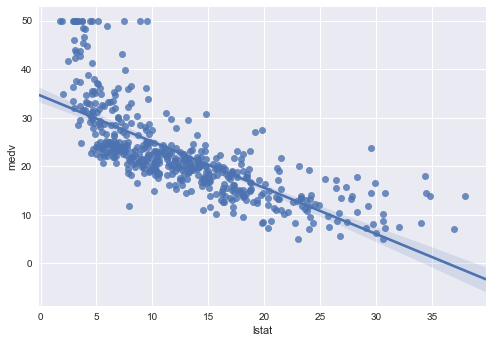

In [2]:
# Let's fit a simple linear regression model with medv as the response 
# and lstat (percent of households with low socioeconomic status) as the predictor

sns.regplot('lstat', 'medv', data=boston)
plt.show()

In [3]:
import statsmodels.formula.api as smf
results = smf.ols('medv ~ lstat', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           5.08e-88
Time:                        16:10:18   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

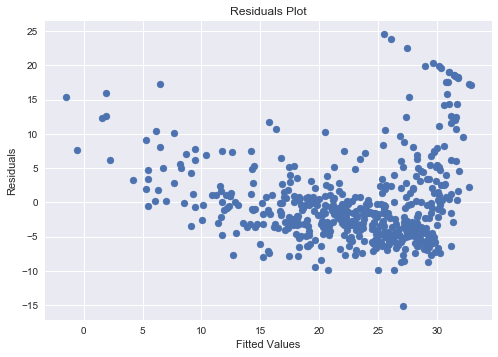

In [7]:
# Let's examine the residuals

plt.scatter(results.fittedvalues, results.resid)
plt.title('Residuals Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()
# Our residual plot suggests that there is non-linearity

## Multiple Linear Regression

In [10]:
# Using two predictors, lstat and age
results = smf.ols('medv ~ lstat + age', data = boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           2.98e-88
Time:                        16:21:11   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# using all of the predictors
predictors = [p for p in boston.columns if p != 'medv']
predictors_str = ' + '.join(predictors)
results = smf.ols('medv ~ {}'.format(predictors_str), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          6.72e-135
Time:                        16:26:48   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# using all of the predictors except for age and indus since they have high p values
predictors = [p for p in boston.columns if p not in ['medv', 'age', 'indus']]
predictors_str = ' + '.join(predictors)
results = smf.ols('medv ~ {}'.format(predictors_str), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          5.54e-137
Time:                        16:28:07   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
crim          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
zn             0.0458      0.014      3.390      0.001       0.019       0.072
chas           2.7187      0.854      3.183      0.002       1.040       4.397
nox          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
rm             3.8016      0.406      9.356      0.000       3.003       4.600
dis           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
rad            0.2996      0.063      4.726      0.000       0.175       0.424
tax           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
ptratio       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
black          0.0093      0.003      3.475      0.001       0.004       0.015
lstat         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Interaction Terms
# the syntax lstat * age simultaneously includes lstat, age, and the interaction term lstat*age

results = smf.ols('medv ~ lstat * age', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           4.86e-88
Time:                        16:36:26   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# Non-linear transformations

results = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          1.56e-112
Time:                        16:39:18   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can use the `anova_lm` function to compare if the quadratic fit is superior to the linear fit

The `anova_lm` function performs a hypothesis test comparing the two models. The null hypothesis is that the two models fit the data equally well. We can use the F statistic and the p-value (denoted as Pr(>F) in the table) to see if the null hypothesis can be rejected

In [21]:
from statsmodels.stats.anova import anova_lm

linear_results = smf.ols('medv ~ lstat', data=boston).fit()
quadratic_results = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=boston).fit()
anova_lm(linear_results, quadratic_results)
# the p-value is basically 0 so the model with the quadratic term is superior to the linear model

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


## Qualitiative Predictors

We will examine the Carseats data and will attempt to predict `Sales` (child car seat sales) in 400 locations based on multiple predictors.

`ShelveLoc` represents the quality of the shelving rotation for the car seat with three possible levels: Bad, Medium, Good. 

In [23]:
carseats = pd.read_csv('data/carseats.csv')
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Exercises

## Conceptual

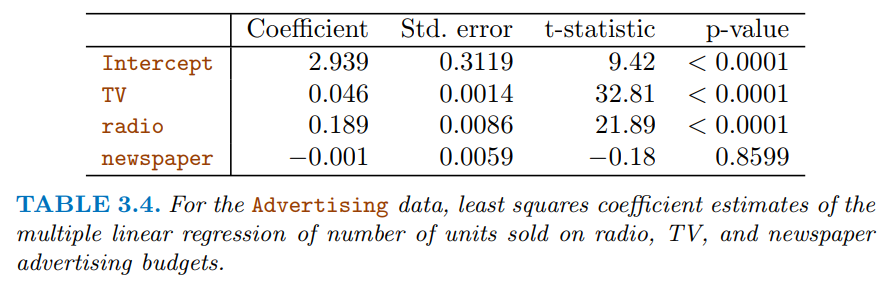

1. Describe the null hypothesis to which the p-values given in 3.4 correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of `sales`, `TV`, `radio`, and `newspaper`.

2. Carefully explain the differences between KNN classifier and KNN regression methods.

3. Suppose we have a data set with 5 predictors, $ X_1 = GPA, X_2 = IQ, X_3 = Gender $ (where 1 is Female and 0 is Male). $X_4$ is the interaction between GPA and IQ and $X_5$ is the interaction between GPA and gender. The response is starting salary after graduation (in thousands of dollars). Our least squares fit gives us $\beta_0 = 50, \beta_1 = 20, \beta_2 = 0.07, \beta_3 = 35, \beta_4 = 0.01, \beta_5 = -10 $. 
  1. Which answer is correct and why? 
    1. For a fixed value of IQ and GPA, males earn more on average than females
    2. For a fixed value of IQ and GPA, females earn more on average than males
    3. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough
    4. For a fixed value of IQ and GPA, females earn more on average than males provided that GPA is high enough
  2. Predict the salary of a female with an IQ of 110 and a GPA of 4.0
  3. True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer

### Answers
1. The probability (p-value) that the TV & radio predictors do not have an effect on sales is extremely low, < 0.0001, so we can assume that TV and radio advertising budgets do make a difference on sales. However, the p-value for newspaper is approximately 0.86, which means we don't have enough evidence to reject the null hypothesis for newspaper. 
2. The KNN classifier aims to categorize an unknown observation into a discrete group, whereas KNN regression aims to estimate the value of a variable based on the value of the predictors. They both observe the values of the unobserved sample's k nearest neighbors. In regression, it takes the average of the k nearest neighbors as the estimated value, and in classification, it takes the mode of the category as its estimation.
3. 
  1. 
    * Men: $salary = 50 + 20 * GPA + 0.07 * IQ + 0.01 * (GPA*IQ) $
    * Women: $salary = 85 + 20 * GPA + 0.07 * IQ + 0.01 * (GPA*IQ) - 10 * (GPA) $
    * Therefore, the third option is true. Although women have a starting advantage of +35, they are penalized for having a higher GPA. If a man has a GPA > 3.5, then on average they will make earn more than women of the same IQ and GPA.
  2. $85 + 20*4.0 + 0.07*110 + 0.01*(4.0*110) - 10*4.0 = 137.1$
  3. False. You would have to know the p-value to see if you could reject the null hypothesis.

## Applied

### Auto Data Set
Perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor.
1. Use the summary function to print the results and comment on the output, such as:
  1. Is there a relationship between the predictor and the response?
  2. How strong is the relationship between the predictor and the response?
  3. Is the relationship between the predictor and the response positive or negative?
  4. What is the predicted `mpg` associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?
2. Plot the response and the predictor and display the least squares regression line.
3. Produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

In [28]:
auto = pd.read_csv('data/auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [30]:
# The p-value is 0, so there is certainly evidence that there is a relationship between the predictor and response. 
# The coefficent is negative so that means mpg decreases as horsepower increases.
results = smf.ols('mpg ~ horsepower', data=auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           7.03e-81
Time:                        13:29:12   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# For a horsepower of 98, the predicted mpg is:
results.params['Intercept'] + results.params['horsepower']*98

24.467077152512424

In [44]:
# or alternatively, we can use the .predict method
predict_df = pd.DataFrame([98], columns = ['horsepower'])
predict_df
results.predict(predict_df)

0    24.467077
dtype: float64

In [31]:
results.conf_int()

,0,1
Intercept,38.525212,41.346510
horsepower,-0.170517,-0.145172


In [56]:
# create function to compute confidence or prediction interval given an x value
from scipy import stats
def get_interval(ols_result, interval_type, alpha, x_values, conf_x):
    if interval_type == 'confidence':
        add_one = 0
    elif interval_type == 'prediction':
        add_one = 1
    else:
        print("Choose interval_type as confidence or prediction")
        return
    n = len(x_values)
    t_value = stats.t.ppf(1 - alpha / 2, df = n - 2)
    sy = np.sqrt((ols_result.resid ** 2).sum() / (n - 2))
    numerator = (conf_x - x_values.mean()) ** 2
    denominator = ((x_values - x_values.mean()) ** 2).sum()
    interval = t_value * sy * np.sqrt(add_one + 1 / n + numerator / denominator)
    prediction = results.params[0] + results.params[1] * conf_x
    return (prediction - interval, prediction + interval)

In [57]:
get_interval(results, 'confidence', 0.05, auto['horsepower'], 98)

(23.973078960703937, 24.96107534432091)

In [58]:
get_interval(results, 'prediction', 0.05, auto['horsepower'], 98)

(14.809396070967116, 34.12475823405773)

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


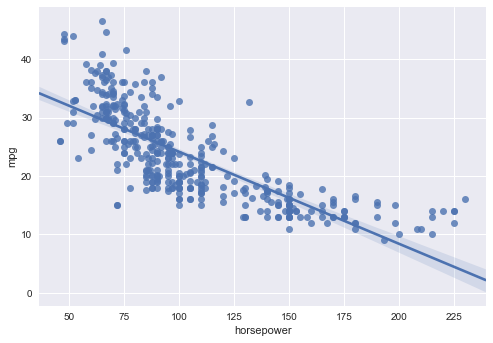

In [45]:
# Plot
sns.regplot('horsepower', 'mpg', data=auto)
plt.show()

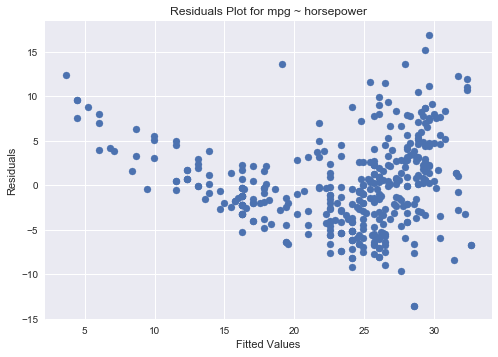

In [52]:
# Residuals

# This plot shows that there seems to be non-linearity in the data
plt.scatter(results.fittedvalues, results.resid)
plt.title('Residuals Plot for mpg ~ horsepower')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

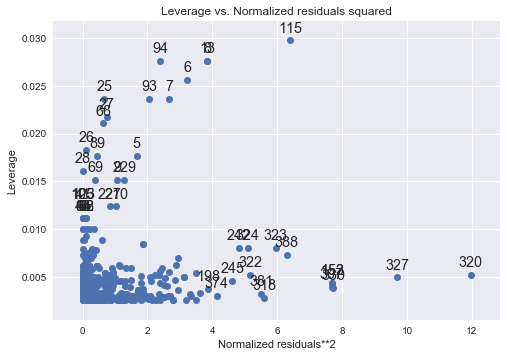

In [60]:
# Let's plot the high-leverage points

from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots()
plot_leverage_resid2(results, ax=ax)
plt.show()

Use multiple linear regression the `Auto` dataset. 

1. Produce a scatterplot correlation plot which includes all of the variables in the dataset. 
2. Compute the matrix of correlations between the variables, except for `name`, which is qualitative
3. Perform multiple linear regression with `mpg` as the response with all other variables except for `name` as predictors. Use the summary function to print the results. Comment on the output, for instance:
  1. Is there a relationship between the predictors and the response?
  2. Which predictors appear to have a statistically significant relationship to the response?
  3. What does the coefficent for the `year` variable suggest?
4. Use the plot function to produce diagnostic plots of the linear regression fit. Comment on any problems you see. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?
5. Fit linear regression models with interaction effects. Do any interactions appear to be statistically significant? 
6. Try a few different transformations of the variables, such as $log(X), \sqrt{X}, X^2$. Comment on your findings

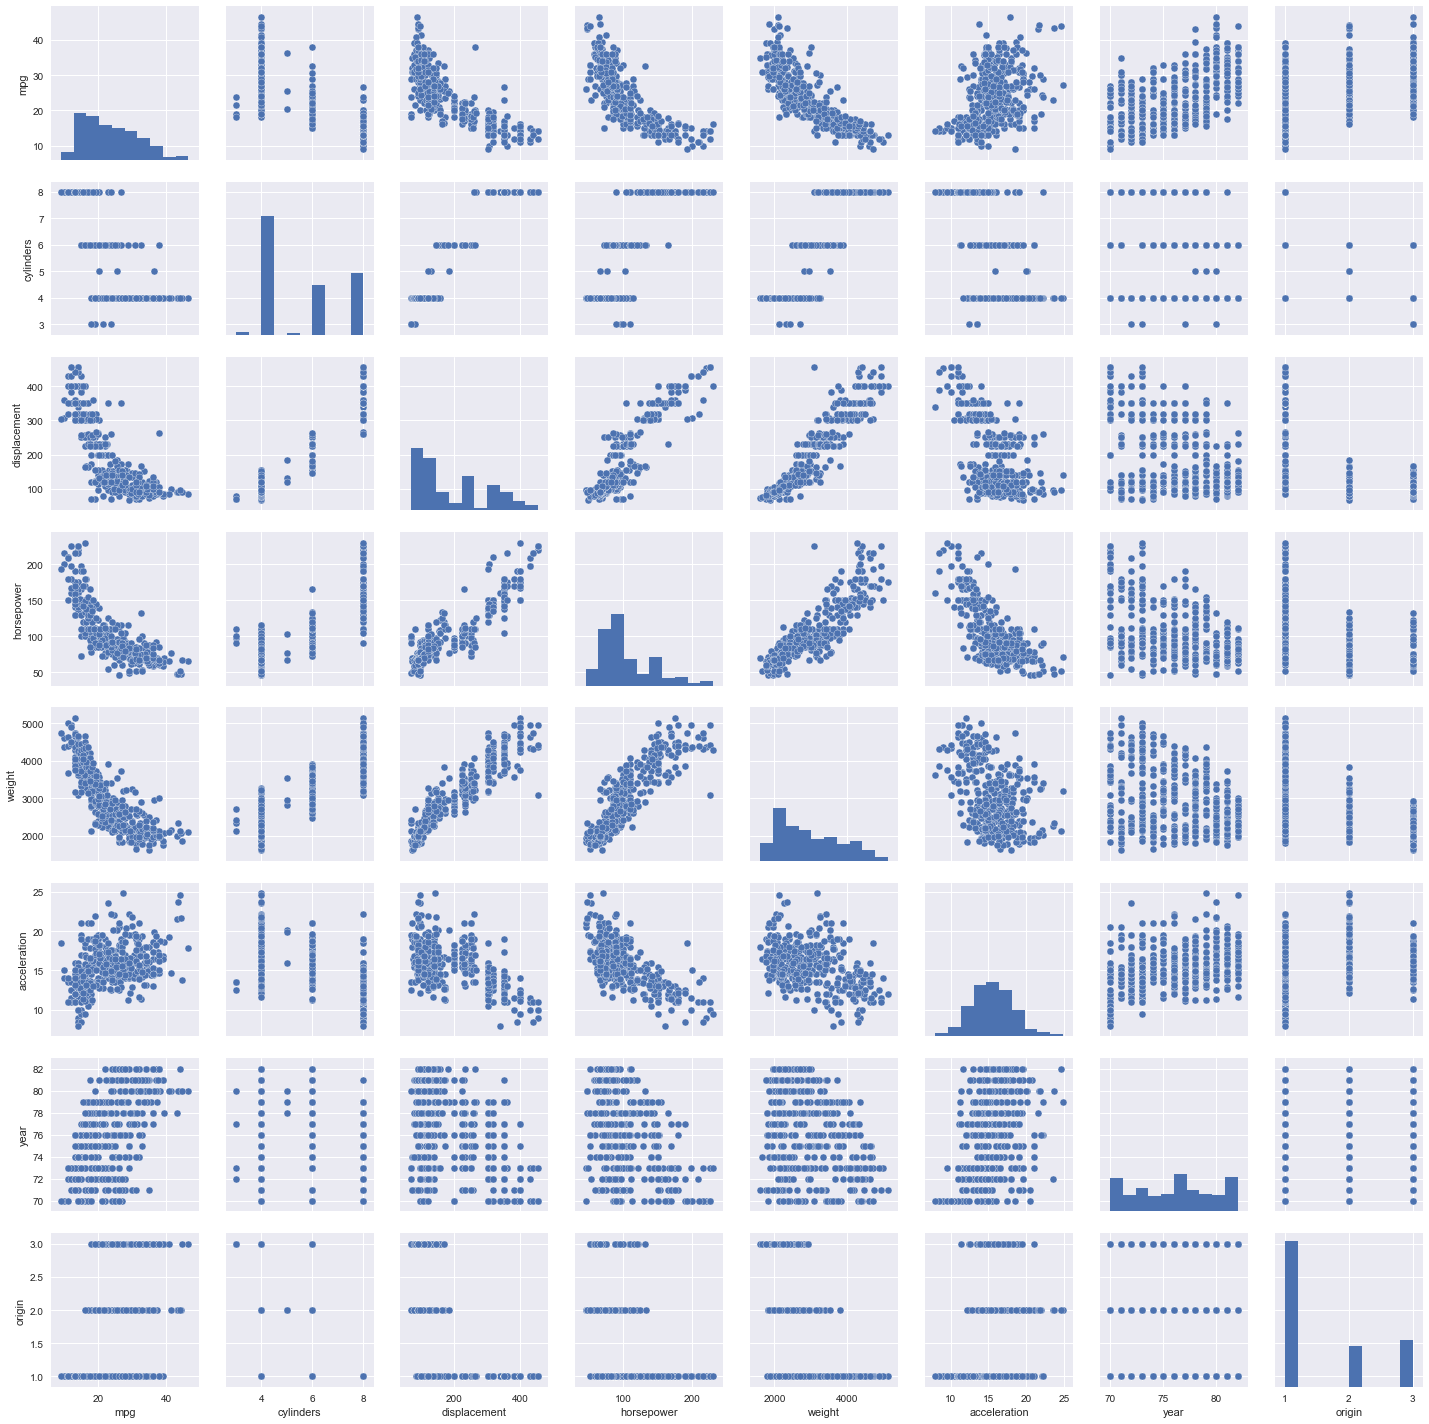

In [63]:
# Scatterplot Matrix
sns.pairplot(auto)
plt.show()

In [64]:
# Correlation Matrix
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [66]:
predictors = [p for p in auto.columns if p not in ['mpg', 'name']]
predictors

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin']

In [68]:
predictors_str = ' + '.join(predictors)
results = smf.ols('mpg ~ {}'.format(predictors_str), data = auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 25 Mar 2019   Prob (F-statistic):          2.04e-139
Time:                        15:02:34   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The F-statistic is very small, so it's clear the predictors have a relationship with the response. It seems that `displacement`, `weight`, `year`, and `origin` have a statistically significant effect, and `year` and `origin` have the most powerful effect of these on the response. The coefficient for the year suggests that with every 1 unit increase in year, the `mpg` increases by 0.7508. 

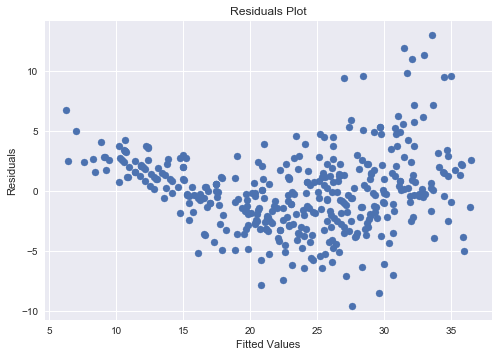

In [72]:
# Residuals

# This plot shows that there seems to be non-linearity in the data
plt.scatter(results.fittedvalues, results.resid)
plt.title('Residuals Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

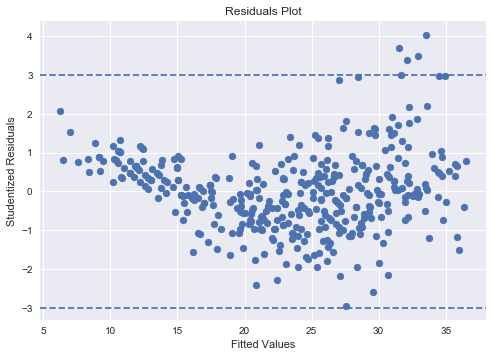

In [81]:
# Studentized Residuals, so we can identify outliers
# From this plot, we see that only a few points are outliers

from statsmodels.stats.outliers_influence import OLSInfluence

results_influence = OLSInfluence(results)
plt.scatter(results.fittedvalues, results_influence.resid_studentized_external)
plt.axhline(3, linestyle='dashed')
plt.axhline(-3, linestyle='dashed')
plt.title('Residuals Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.show()

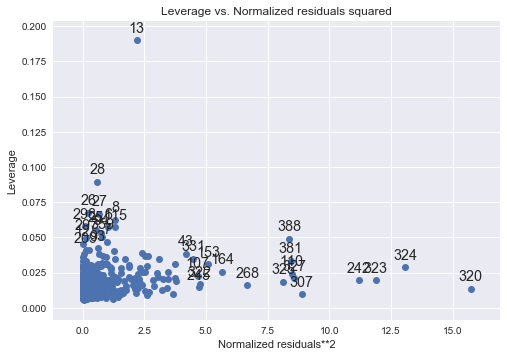

In [70]:
# Let's plot the high-leverage points
# 13 is a very high-leverage point

from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots()
plot_leverage_resid2(results, ax=ax)
plt.show()

In [104]:
# Now let's try every possible interaction effect

from itertools import combinations

interactions = [c[0] + " * " + c[1] for c in combinations(predictors, 2)]
interactions

['cylinders * displacement',
 'cylinders * horsepower',
 'cylinders * weight',
 'cylinders * acceleration',
 'cylinders * year',
 'cylinders * origin',
 'displacement * horsepower',
 'displacement * weight',
 'displacement * acceleration',
 'displacement * year',
 'displacement * origin',
 'horsepower * weight',
 'horsepower * acceleration',
 'horsepower * year',
 'horsepower * origin',
 'weight * acceleration',
 'weight * year',
 'weight * origin',
 'acceleration * year',
 'acceleration * origin',
 'year * origin']

In [108]:
# The only interaction effect statistically significant with p-value < 0.01 is acceleration:origin

interactions_str = " + ".join(interactions)
results_interactions = smf.ols('mpg ~ ' + interactions_str, data = auto).fit()
results_interactions.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Mon, 25 Mar 2019   Prob (F-statistic):          4.01e-155
Time:                        15:28:49   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

In [116]:
# let's try transforming some variables
# adding the log of displacement, horsepower, and weight increased the R-squared statistic
# sqrt, and squared produce a similar R-squared statistic

transform_str = ' + np.log(displacement) + np.log(horsepower) + np.log(weight)'
results_transformed = smf.ols('mpg ~ ' + interactions_str + transform_str, data=auto).fit()
results_transformed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     93.58
Date:                Mon, 25 Mar 2019   Prob (F-statistic):          2.76e-152
Time:                        15:40:23   Log-Likelihood:                -929.27
No. Observations:                 392   AIC:                             1923.
Df Residuals:                     360   BIC:                             2050.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    48.8948    131.060      0.373      0.709    -208.844     306.633
cylinders                     7.7842      8.409      0.926      0.355      -8.753      24.321
displacement                 -0.4381      0.215     -2.036      0.042      -0.861      -0.015
cylinders:displacement       -0.0062      0.008     -0.783      0.434      -0.022       0.009
horsepower                    0.5897      0.380      1.553      0.121      -0.157       1.337
cylinders:horsepower          0.0056      0.026      0.218      0.827      -0.045       0.056
weight                        0.0027      0.023      0.115      0.908      -0.043       0.049
cylinders:weight              0.0007      0.001      0.601      0.549      -0.001       0.003
acceleration                 -5.9837      2.247     -2.663      0.008     -10.402      -1.565
cylinders:acceleration        0.2426      0.176      1.375      0.170      -0.104       0.590
year                          0.6800      0.616      1.105      0.270      -0.530       1.890
cylinders:year               -0.1733      0.098     -1.759      0.079      -0.367       0.020
origin                      -21.3851      7.170     -2.982      0.003     -35.486      -7.284
cylinders:origin              0.2835      0.518      0.547      0.585      -0.736       1.303
displacement:horsepower      -0.0001      0.000     -0.385      0.700      -0.001       0.000
displacement:weight        2.152e-05   1.97e-05      1.095      0.274   -1.71e-05    6.02e-05
displacement:acceleration    -0.0034      0.004     -0.945      0.345      -0.010       0.004
displacement:year             0.0060      0.002      2.453      0.015       0.001       0.011
displacement:origin           0.0355      0.027      1.298      0.195      -0.018       0.089
horsepower:weight         -2.144e-05   3.82e-05     -0.561      0.575   -9.66e-05    5.37e-05
horsepower:acceleration      -0.0058      0.005     -1.122      0.262      -0.016       0.004
horsepower:year              -0.0060      0.004     -1.505      0.133      -0.014       0.002
horsepower:origin             0.0012      0.030      0.039      0.969      -0.058       0.060
weight:acceleration           0.0002      0.000      0.936      0.350      -0.000       0.001
weight:year                  -0.0002      0.000     -1.039      0.299      -0.001       0.000
weight:origin                -0.0010      0.002     -0.558      0.577      -0.004       0.002
acceleration:year             0.0566      0.026      2.144      0.033       0.005       0.109
acceleration:origin           0.4817      0.162      2.972      0.003       0.163       0.800
year:origin                   0.1427      0.075      1.904      0.058      -0.005       0.290
np.log(displacement)         -5.7299      9.716     -0.590      0.556     -

### Carseats Data Set

  1. Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`. 
  2. Provide an interpretation of each coefficient in the model. Remember that some variables are qualitative.
  3. Write out the model in equation form
  4. For which of the predictors can you reject the null hypothesis?
  5. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of associate with the outcome
  6. How well do the models in (a) and (e) fit the data?
  7. Using the model from e, obtain the 95% confidence intervals for the coefficients
  8. Is there evidence of outliers or high leverage observations in the model from e?

In [119]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [121]:
results = smf.ols('Sales ~ Price + Urban + US', data=carseats).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           2.39e-23
Time:                        15:47:57   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is no difference if someone is living in an urban area or not. Living in the US adds approximately 1.2 to Sales from the baseline of 13 for living outside the states. For every 1 unit increase in Price there is a 0.05 decrease in sales. We can reject the null hypothesis for `US` and `Price`. 

Model Equation, ignoring `Urban` since it's not significant
* Not US: $ Sales = 13.0435 - 0.0545 * Price $
* US: $ Sales = 14.2441 - 0.0545 * Price $

In [123]:
# Removing Urban had no effect on R-squared and the F-statistic increased.
# The 95% confidence intervals are also in the table
results = smf.ols('Sales ~ Price + US', data=carseats).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           2.66e-24
Time:                        15:58:51   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

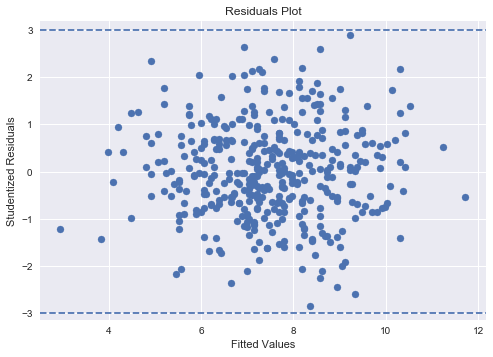

In [124]:
# Outliers
# There doesn't appear to be outliers

results_influence = OLSInfluence(results)
plt.scatter(results.fittedvalues, results_influence.resid_studentized_external)
plt.axhline(3, linestyle='dashed')
plt.axhline(-3, linestyle='dashed')
plt.title('Residuals Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.show()

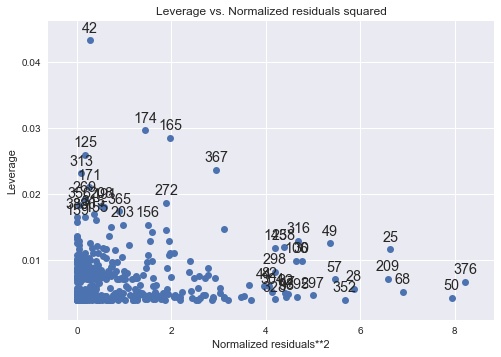

In [125]:
# High Leverage Points
# 42 is a high leverage point
fig, ax = plt.subplots()
plot_leverage_resid2(results, ax=ax)
plt.show()

### Simulated Data & the Effects of Noise

1. Create a vector `x` containing 100 observations drawn from $ N(0, 1) $, i.e. a normal distribution with mean 0 and variance 1. This represents a feature, X.
2. Create a vector `eps`, containing 100 observations drawn from $ N(0, 0.25) $. 
3. Using `x` and `eps`, generate a vector `y` according to the model $Y = -1 + 0.5X + \epsilon$. What is the length of vector `y`? What are the values $\beta_0, \beta_1$ in this linear model?
4. Create a scatter plot displaying the relationship between `x` and `y`. Comment on what you observe.
5. Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $\hat{\beta}_0, \hat{\beta}_1$ compare to $\beta_0, \beta_1$? 
6. Display the least squares line on the scatter plot obtained previously. Draw the population regression line on the plot in a different color. 
7. Now fit a polynomial regression model that predicts `y` using `x` and $x^2$. Is there evidence that the quadratic term improves the model fit?
8. Repeat 1-6 after modifying the data generation process in such a way that there is less noise in the data, for example by decreasing the variance of the noise.
9. Repeat 1-6 after modifying the data to generate more noise in the data.
10. What are the confidence intervals for the coefficients based on the original data set, the noisier data set, and the less noisy data set?

In [127]:
x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, 0.25, 100)

In [135]:
# The length of y is 100, beta_0 is -1 and beta_1 is 0.5
y = -1 + 0.5*x + eps

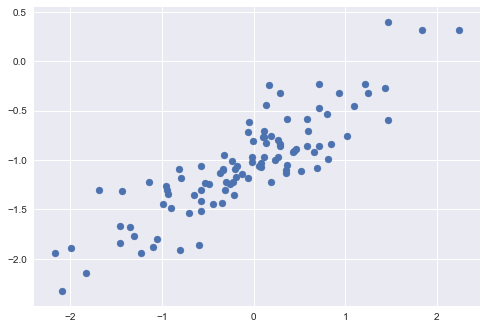

In [136]:
# Though there is noise, the relationship looks clearly linear
plt.scatter(x, y)
plt.show()

In [140]:
import statsmodels.api as sm

# The estimates for beta_0 and beta_1 are quite close

results = sm.OLS(y, sm.add_constant(x)).fit() # We add a column of ones so that we can get the intercept
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     311.1
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           3.56e-32
Time:                        16:25:12   Log-Likelihood:                -1.6958
No. Observations:                 100   AIC:                             7.392
Df Residuals:                      98   BIC:                             12.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9963      0.025    -39.780      0.000      -1.046      -0.947
x1             0.5155      0.029     17.639      0.000       0.458       0.574
==============================================================================
Omnibus:                        2.704   Durbin-Watson:                   2.601
Prob(Omnibus):                  0.259   Jarque-Bera (JB):                2.336
Skew:                           0.373   Prob(JB):                        0.311
Kurtosis:                       3.065   Cond. No.                         1.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

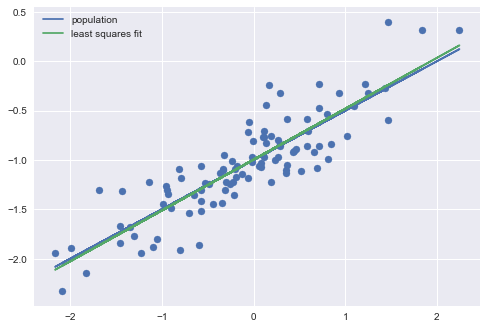

In [148]:
# The population and the least squares fit are very close
plt.scatter(x, y)
plt.plot(x, -1 + 0.5*x, label='population')
plt.plot(x, results.params[0] + results.params[1]*x, label='least squares fit')
plt.legend()
plt.show()

In [155]:
# The x^2 term doesn't seem significant, but it increases the R-squared statistic slightly because it's 
# overfitting to some of the noise

x2 = np.column_stack((np.ones(100), x, x**2))
results = sm.OLS(y, x2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     157.1
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           3.78e-31
Time:                        16:39:38   Log-Likelihood:               -0.93503
No. Observations:                 100   AIC:                             7.870
Df Residuals:                      97   BIC:                             15.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0165      0.030    -33.879      0.000      -1.076      -0.957
x1             0.5235      0.030     17.522      0.000       0.464       0.583
x2             0.0287      0.024      1.220      0.226      -0.018       0.075
==============================================================================
Omnibus:                        2.133   Durbin-Watson:                   2.652
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                1.812
Skew:                           0.329   Prob(JB):                        0.404
Kurtosis:                       3.044   Cond. No.                         2.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

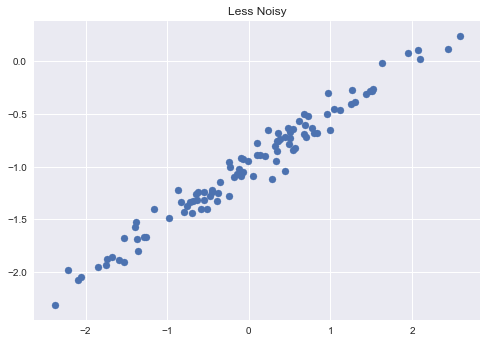

In [158]:
# Repeating with Less Noise
x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, 0.10, 100)
y = -1 + 0.5*x + eps
plt.scatter(x, y)
plt.title('Less Noisy')
plt.show()

In [159]:
# The R-squared statistic is much higher and the coefficients are closer to the 
# population line
results = sm.OLS(y, sm.add_constant(x)).fit() # We add a column of ones so that we can get the intercept
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     2953.
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           5.55e-75
Time:                        16:41:55   Log-Likelihood:                 90.343
No. Observations:                 100   AIC:                            -176.7
Df Residuals:                      98   BIC:                            -171.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9917      0.010   -100.117      0.000      -1.011      -0.972
x1             0.5029      0.009     54.342      0.000       0.484       0.521
==============================================================================
Omnibus:                        0.216   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.898   Jarque-Bera (JB):                0.073
Skew:                          -0.065   Prob(JB):                        0.964
Kurtosis:                       3.022   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

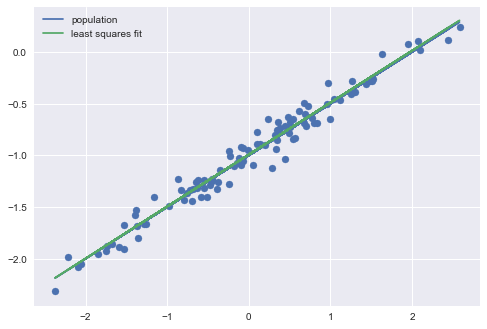

In [160]:
plt.scatter(x, y)
plt.plot(x, -1 + 0.5*x, label='population')
plt.plot(x, results.params[0] + results.params[1]*x, label='least squares fit')
plt.legend()
plt.show()

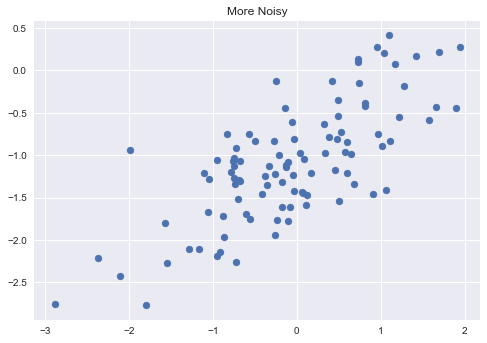

In [165]:
# Repeating with More Noise
x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, 0.50, 100)
y = -1 + 0.5*x + eps
plt.scatter(x, y)
plt.title('More Noisy')
plt.show()

In [166]:
# The R-squared statistic is much lower but the coefficients are still close to the population line
results = sm.OLS(y, sm.add_constant(x)).fit() # We add a column of ones so that we can get the intercept
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     118.5
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           1.47e-18
Time:                        16:47:26   Log-Likelihood:                -64.268
No. Observations:                 100   AIC:                             132.5
Df Residuals:                      98   BIC:                             137.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0526      0.047    -22.591      0.000      -1.145      -0.960
x1             0.5420      0.050     10.885      0.000       0.443       0.641
==============================================================================
Omnibus:                        2.204   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.332   Jarque-Bera (JB):                1.866
Skew:                           0.204   Prob(JB):                        0.393
Kurtosis:                       2.469   Cond. No.                         1.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

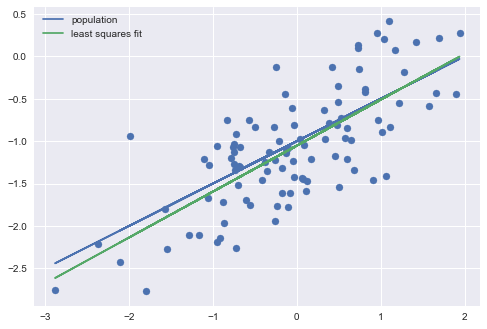

In [167]:
# You can see a slight difference in the lines
plt.scatter(x, y)
plt.plot(x, -1 + 0.5*x, label='population')
plt.plot(x, results.params[0] + results.params[1]*x, label='least squares fit')
plt.legend()
plt.show()

The confidence intervals get larger as more noise is added

### Simulated Data & the Effects of Collinearity

1. Perform the following commands to produce sample data where two variables are correlated
```
np.random.seed(1)
x1 = np.random.rand(100)
x2 = .5 * x1 + np.random.rand(100) / 10
y = 2 + 2 * x1 + .3 * x2 + np.random.randn(100)
```
2. What is the correlation between `x1` and `x2`? Create a scatterplot showing the relationship between the variables
3. Using this data, fit a least squares regression to predict `y` using `x1` and `x2`. Describe the results obtained. How do the estimated coefficients relate to the true coefficients? Can you reject the null hypotheses $\beta_1 = 0$ or $\beta_2 = 0$? 
4. Now fit a least squares regression to predict `y` using only `x1`. Comment on the results. Can you reject the null hypothesis $\beta_1 = 0$?
5. Now fit a least squares regression to predict `y` using only `x2`. Comment on the results. Can you reject the null hypothesis $\beta_2 = 0$?
6. Do the results in 3-5 contradict each other? Explain your answer
7. Now suppose we obtain one additional observation, which was unfortunately mismeasured $ x_1 = 0.1, x_2 = 0.8, y = 6$. Re-fit the linear models with this new data. What effect does it have on each of the models? In each model is this observation an outlier? A high leverage point? Both?

In [170]:
# Our regression coefficients are 2, 2, 0.3
np.random.seed(1)
x1 = np.random.rand(100)
x2 = .5 * x1 + np.random.rand(100) / 10
y = 2 + 2 * x1 + .3 * x2 + np.random.randn(100)

In [171]:
np.corrcoef(x1, x2) # The correlation is extremely high

array([[1.        , 0.97747398],
       [0.97747398, 1.        ]])

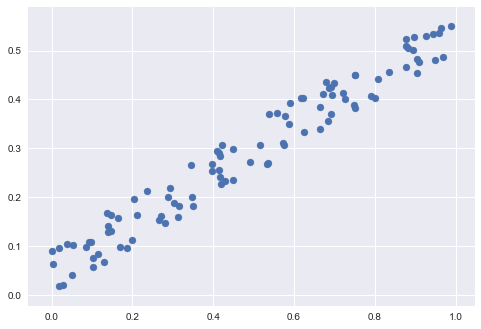

In [172]:
plt.scatter(x1, x2)
plt.show()

In [174]:
# Surprisingly, we have that neither x1 nor x2 are statistically significant
X = np.column_stack((np.ones(100), x1, x2))
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     16.13
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           8.95e-07
Time:                        17:12:45   Log-Likelihood:                -144.37
No. Observations:                 100   AIC:                             294.7
Df Residuals:                      97   BIC:                             302.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2250      0.259      8.583      0.000       1.710       2.739
x1             2.4383      1.675      1.456      0.149      -0.886       5.763
x2            -0.8693      3.292     -0.264      0.792      -7.404       5.665
==============================================================================
Omnibus:                        0.285   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.393
Skew:                           0.118   Prob(JB):                        0.822
Kurtosis:                       2.804   Cond. No.                         41.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
# Now let's try with just x1
# Now, we can reject the null hypothesis and x1 is statistically significant
results = sm.OLS(y, sm.add_constant(x1)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     32.50
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           1.26e-07
Time:                        17:14:22   Log-Likelihood:                -144.41
No. Observations:                 100   AIC:                             292.8
Df Residuals:                      98   BIC:                             298.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1817      0.200     10.914      0.000       1.785       2.578
x1             2.0060      0.352      5.701      0.000       1.308       2.704
==============================================================================
Omnibus:                        0.282   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.399
Skew:                           0.116   Prob(JB):                        0.819
Kurtosis:                       2.795   Cond. No.                         4.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
# Now let's try with just x2
# Now, we can reject the null hypothesis and x2 is statistically significant
results = sm.OLS(y, sm.add_constant(x2)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     29.81
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           3.61e-07
Time:                        17:15:28   Log-Likelihood:                -145.45
No. Observations:                 100   AIC:                             294.9
Df Residuals:                      98   BIC:                             300.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0446      0.229      8.929      0.000       1.590       2.499
x1             3.8152      0.699      5.459      0.000       2.428       5.202
==============================================================================
Omnibus:                        0.236   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.388
Skew:                           0.092   Prob(JB):                        0.824
Kurtosis:                       2.757   Cond. No.                         7.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Because `x1` and `x2` have collinearity, it's hard to distinguish their effects when regressed upon together. Separately, the linear relationship between `y` and each predictor is indicated more clearly

In [179]:
# With the addition of the outlier, the correlation between x1 and x2 also goes down
x1_new = np.append(x1, 0.1)
x2_new = np.append(x2, 0.8)
y_new = np.append(y, 6)
np.corrcoef(x1_new, x2_new)

array([[1.        , 0.87688161],
       [0.87688161, 1.        ]])

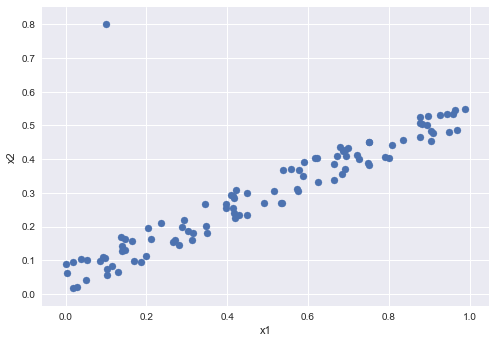

In [189]:
# the added point is a considerable outlier
plt.scatter(x1_new, x2_new)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [180]:
# x2 becomes statistically significant in the x1 + x2 model
# The coefficients are quite off from the actual coefficients
X = np.column_stack((y_new, x1_new, x2_new))
X_df = pd.DataFrame(X, columns = ['y', 'x1', 'x2'])
results = smf.ols('y ~ x1 + x2', data=X_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     18.11
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           2.03e-07
Time:                        17:30:49   Log-Likelihood:                -146.74
No. Observations:                 101   AIC:                             299.5
Df Residuals:                      98   BIC:                             307.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9991      0.223      8.965      0.000       1.557       2.442
x1            -0.0749      0.736     -0.102      0.919      -1.535       1.385
x2             4.1206      1.382      2.982      0.004       1.378       6.863
==============================================================================
Omnibus:                        0.207   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.370
Skew:                           0.075   Prob(JB):                        0.831
Kurtosis:                       2.744   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

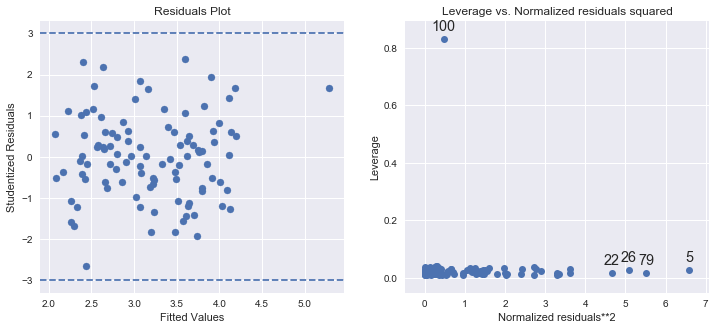

In [186]:
# Let's look at outliers and high leverage points
# The added point isn't an outlier, but it has extremely high leverage

fig, axes = plt.subplots(1, 2, figsize = (12, 5))

# Studentized Residuals
results_influence = OLSInfluence(results)
axes[0].scatter(results.fittedvalues, results_influence.resid_studentized_external)
axes[0].axhline(3, linestyle='dashed')
axes[0].axhline(-3, linestyle='dashed')
axes[0].set_title('Residuals Plot')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Studentized Residuals')

#High Leverage Points
plot_leverage_resid2(results, ax=axes[1])
plt.show()

In [190]:
# Just x1
results = smf.ols('y ~ x1', data=X_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     25.31
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           2.18e-06
Time:                        17:35:56   Log-Likelihood:                -151.13
No. Observations:                 101   AIC:                             306.3
Df Residuals:                      99   BIC:                             311.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2931      0.208     11.034      0.000       1.881       2.705
x1             1.8492      0.368      5.031      0.000       1.120       2.579
==============================================================================
Omnibus:                        3.316   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                2.656
Skew:                           0.347   Prob(JB):                        0.265
Kurtosis:                       3.386   Cond. No.                         4.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

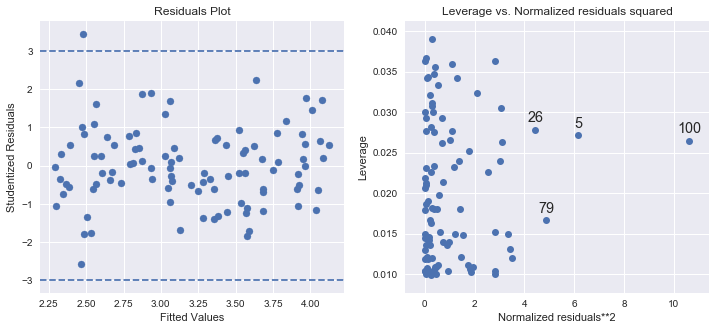

In [191]:
# Let's look at outliers and high leverage points
# The new point is considered an outlier, but not very high leverage

fig, axes = plt.subplots(1, 2, figsize = (12, 5))

# Studentized Residuals
results_influence = OLSInfluence(results)
axes[0].scatter(results.fittedvalues, results_influence.resid_studentized_external)
axes[0].axhline(3, linestyle='dashed')
axes[0].axhline(-3, linestyle='dashed')
axes[0].set_title('Residuals Plot')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Studentized Residuals')

#High Leverage Points
plot_leverage_resid2(results, ax=axes[1])
plt.show()

In [192]:
# Just x2
results = smf.ols('y ~ x2', data=X_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     36.58
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           2.62e-08
Time:                        17:37:39   Log-Likelihood:                -146.75
No. Observations:                 101   AIC:                             297.5
Df Residuals:                      99   BIC:                             302.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9996      0.222      9.014      0.000       1.559       2.440
x2             3.9972      0.661      6.048      0.000       2.686       5.309
==============================================================================
Omnibus:                        0.217   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.897   Jarque-Bera (JB):                0.382
Skew:                           0.075   Prob(JB):                        0.826
Kurtosis:                       2.739   Cond. No.                         6.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

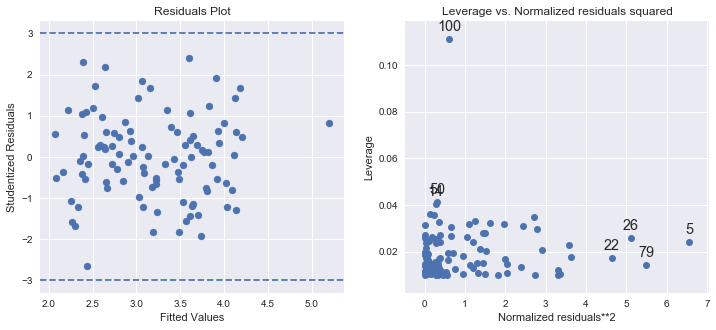

In [193]:
# Let's look at outliers and high leverage points
# The new point is not considered an outlier, but it is very high leverage

fig, axes = plt.subplots(1, 2, figsize = (12, 5))

# Studentized Residuals
results_influence = OLSInfluence(results)
axes[0].scatter(results.fittedvalues, results_influence.resid_studentized_external)
axes[0].axhline(3, linestyle='dashed')
axes[0].axhline(-3, linestyle='dashed')
axes[0].set_title('Residuals Plot')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Studentized Residuals')

#High Leverage Points
plot_leverage_resid2(results, ax=axes[1])
plt.show()

### Boston Data Set

We will try to predict per capita crime rate using the other variables in this data set. 

1. For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back your assertions
2. Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis?
3. How do our results from 1 compare to the results from 2? Create a plot displaying the univariate regression coefficients from 1 on the x-axis and the multiple regression coefficients from 2 on the y-axis. 
4. Is there evidence of a non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form $ Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon $

In [194]:
boston = pd.read_csv('data/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


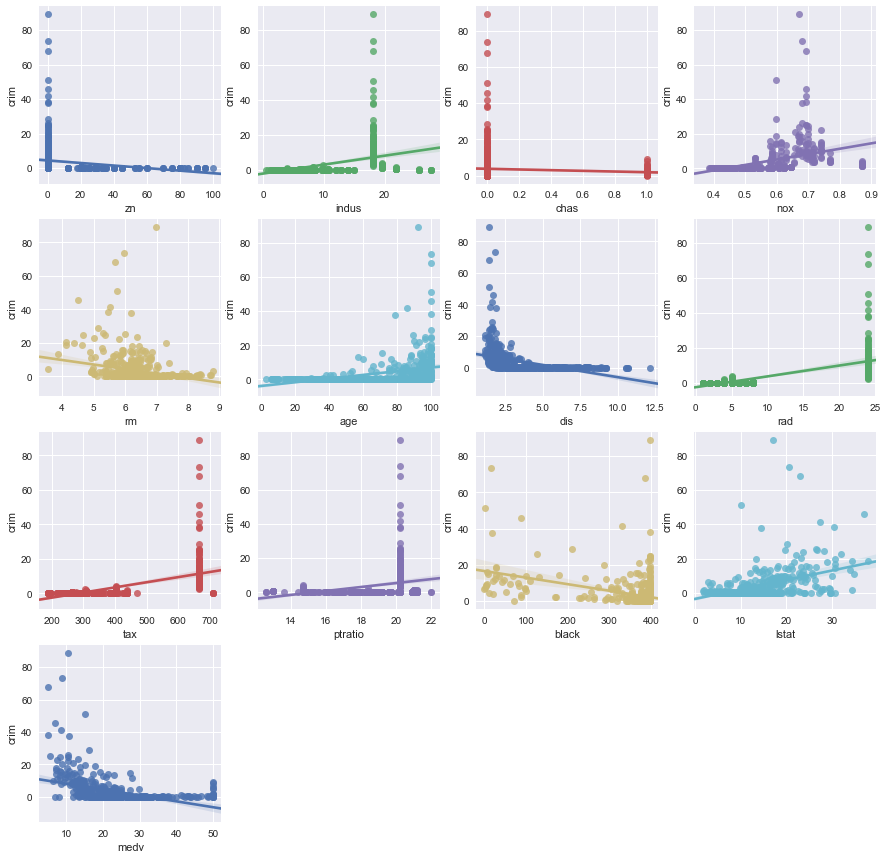

In [212]:
predictors = [p for p in boston.columns if p not in ['crim']]
significant_p = []

fig, axes = plt.subplots(4, 4, figsize=(15, 15))
axes = axes.ravel()

for ind, ax in enumerate(axes):
    if ind < len(predictors):
        results = smf.ols('crim ~ ' + predictors[ind], data=boston).fit()
        if results.pvalues[predictors[ind]] < 0.05: # checking for statistical significance
            significant_p.append(predictors[ind])
        sns.regplot(x=predictors[ind], y='crim', data=boston, ax=ax)
    else:
        ax.axis('off')
plt.show() 

In [215]:
# Which ones aren't significant? chas is the only insignificant predictor
set(predictors) - set(significant_p)

{'chas'}

In [219]:
# From the multiple regression, it seems that the only statistically significant
# predictors with p < 0.05: zn, dis, rad, black, medv
predictors_str = " + ".join(predictors)
results = smf.ols('crim ~ ' + predictors_str, data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           1.57e-56
Time:                        10:39:21   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019       2.818      31.248
zn             0.0449      0.019      2.394      0.017       0.008       0.082
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
age            0.0015      0.018      0.081      0.935      -0.034       0.037
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad            0.5882      0.088      6.680      0.000       0.415       0.761
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
black         -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [232]:
multiple_reg_coeffs = results.params.iloc[1:]
simple_reg_coeffs = pd.Series()
for p in predictors:
    results_slr = smf.ols('crim ~ ' + p, data=boston).fit()
    simple_reg_coeffs = simple_reg_coeffs.append(results_slr.params.loc[[p]])
both_models = pd.DataFrame({'simple': simple_reg_coeffs, 'multiple': multiple_reg_coeffs})
both_models

,simple,multiple
zn,-0.073935,0.044855
indus,0.509776,-0.063855
chas,-1.892777,-0.749134
nox,31.248531,-10.313535
rm,-2.684051,0.430131
age,0.107786,0.001452
dis,-1.550902,-0.987176
rad,0.617911,0.588209
tax,0.029742,-0.003780
ptratio,1.151983,-0.271081


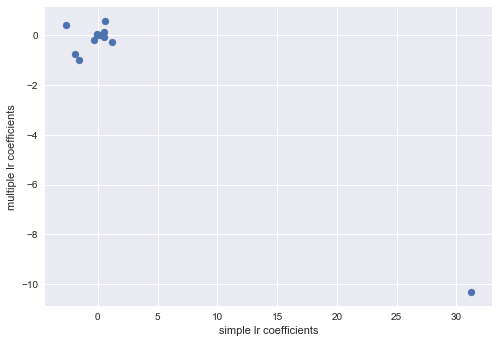

In [234]:
# For nox, the simple coefficient is +30 and for multiple it's -10
plt.scatter('simple', 'multiple', data=both_models)
plt.xlabel('simple lr coefficients')
plt.ylabel('multiple lr coefficients')
plt.show()

In [238]:
# Nothing here
results = smf.ols('crim ~ {p} + np.power({p}, 2) + np.power({p}, 3)'.format(p=predictors[0]), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           1.28e-06
Time:                        10:59:02   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.8461      0.433     11.192      0.000       3.995       5.697
zn                 -0.3322      0.110     -3.025      0.003      -0.548      -0.116
np.power(zn, 2)     0.0065      0.004      1.679      0.094      -0.001       0.014
np.power(zn, 3) -3.776e-05   3.14e-05     -1.203      0.230   -9.94e-05    2.39e-05
==============================================================================
Omnibus:                      569.133   Durbin-Watson:                   0.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33700.991
Skew:                           5.272   Prob(JB):                         0.00
Kurtosis:                      41.565   Cond. No.                     1.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [239]:
# indus^2 and indus^3 show statistical significance
results = smf.ols('crim ~ {p} + np.power({p}, 2) + np.power({p}, 3)'.format(p=predictors[1]), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     58.69
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           1.55e-32
Time:                        10:59:40   Log-Likelihood:                -1730.3
No. Observations:                 506   AIC:                             3469.
Df Residuals:                     502   BIC:                             3486.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.6626      1.574      2.327      0.020       0.570       6.755
indus                 -1.9652      0.482     -4.077      0.000      -2.912      -1.018
np.power(indus, 2)     0.2519      0.039      6.407      0.000       0.175       0.329
np.power(indus, 3)    -0.0070      0.001     -7.292      0.000      -0.009      -0.005
==============================================================================
Omnibus:                      611.788   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51742.286
Skew:                           5.820   Prob(JB):                         0.00
Kurtosis:                      51.153   Cond. No.                     2.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [240]:
# nothing here
results = smf.ols('crim ~ {p} + np.power({p}, 2) + np.power({p}, 3)'.format(p=predictors[2]), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Tue, 26 Mar 2019   Prob (F-statistic):              0.209
Time:                        11:00:10   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.7444      0.396      9.453      0.000       2.966       4.523
chas                 -0.6309      0.502     -1.257      0.209      -1.617       0.355
np.power(chas, 2)    -0.6309      0.502     -1.257      0.209      -1.617       0.355
np.power(chas, 3)    -0.6309      0.502     -1.257      0.209      -1.617       0.355
==============================================================================
Omnibus:                      561.663   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30645.429
Skew:                           5.191   Prob(JB):                         0.00
Kurtosis:                      39.685   Cond. No.                     3.42e+32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.39e-63. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [241]:
# nox^2 and nox^3 show statistical significance
results = smf.ols('crim ~ {p} + np.power({p}, 2) + np.power({p}, 3)'.format(p=predictors[3]), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     70.69
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           3.81e-38
Time:                        11:00:25   Log-Likelihood:                -1717.2
No. Observations:                 506   AIC:                             3442.
Df Residuals:                     502   BIC:                             3459.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          233.0866     33.643      6.928      0.000     166.988     299.185
nox              -1279.3713    170.397     -7.508      0.000   -1614.151    -944.591
np.power(nox, 2)  2248.5441    279.899      8.033      0.000    1698.626    2798.462
np.power(nox, 3) -1245.7029    149.282     -8.345      0.000   -1538.997    -952.409
==============================================================================
Omnibus:                      614.412   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53523.997
Skew:                           5.851   Prob(JB):                         0.00
Kurtosis:                      52.008   Cond. No.                     1.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [242]:
# nothing here
results = smf.ols('crim ~ {p} + np.power({p}, 2) + np.power({p}, 3)'.format(p=predictors[4]), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     12.17
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           1.07e-07
Time:                        11:00:45   Log-Likelihood:                -1788.6
No. Observations:                 506   AIC:                             3585.
Df Residuals:                     502   BIC:                             3602.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         112.6246     64.517      1.746      0.081     -14.132     239.382
rm                -39.1501     31.311     -1.250      0.212    -100.668      22.368
np.power(rm, 2)     4.5509      5.010      0.908      0.364      -5.292      14.394
np.power(rm, 3)    -0.1745      0.264     -0.662      0.509      -0.693       0.344
==============================================================================
Omnibus:                      585.097   Durbin-Watson:                   0.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40144.207
Skew:                           5.465   Prob(JB):                         0.00
Kurtosis:                      45.245   Cond. No.                     5.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [243]:
# power^2 and power^3 show statistical significance
results = smf.ols('crim ~ {p} + np.power({p}, 2) + np.power({p}, 3)'.format(p=predictors[5]), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     35.31
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           1.02e-20
Time:                        11:01:01   Log-Likelihood:                -1757.9
No. Observations:                 506   AIC:                             3524.
Df Residuals:                     502   BIC:                             3541.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.5488      2.769     -0.920      0.358      -7.989       2.892
age                  0.2737      0.186      1.468      0.143      -0.093       0.640
np.power(age, 2)    -0.0072      0.004     -1.988      0.047      -0.014    -8.4e-05
np.power(age, 3)  5.745e-05   2.11e-05      2.724      0.007     1.6e-05    9.89e-05
==============================================================================
Omnibus:                      577.477   Durbin-Watson:                   1.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39586.670
Skew:                           5.336   Prob(JB):                         0.00
Kurtosis:                      44.997   Cond. No.                     4.74e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [244]:
# dis^2, dis^3 showing significance
results = smf.ols('crim ~ {p} + np.power({p}, 2) + np.power({p}, 3)'.format(p=predictors[6]), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     64.37
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           3.14e-35
Time:                        11:02:09   Log-Likelihood:                -1724.0
No. Observations:                 506   AIC:                             3456.
Df Residuals:                     502   BIC:                             3473.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           30.0476      2.446     12.285      0.000      25.242      34.853
dis                -15.5544      1.736     -8.960      0.000     -18.965     -12.144
np.power(dis, 2)     2.4521      0.346      7.078      0.000       1.771       3.133
np.power(dis, 3)    -0.1186      0.020     -5.814      0.000      -0.159      -0.079
==============================================================================
Omnibus:                      577.742   Durbin-Watson:                   1.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42444.706
Skew:                           5.305   Prob(JB):                         0.00
Kurtosis:                      46.596   Cond. No.                     2.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [245]:
# nothing here
results = smf.ols('crim ~ {p} + np.power({p}, 2) + np.power({p}, 3)'.format(p=predictors[7]), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     111.6
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           2.31e-55
Time:                        11:02:29   Log-Likelihood:                -1677.1
No. Observations:                 506   AIC:                             3362.
Df Residuals:                     502   BIC:                             3379.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6055      2.050     -0.295      0.768      -4.633       3.422
rad                  0.5127      1.044      0.491      0.623      -1.538       2.563
np.power(rad, 2)    -0.0752      0.149     -0.506      0.613      -0.367       0.217
np.power(rad, 3)     0.0032      0.005      0.703      0.482      -0.006       0.012
==============================================================================
Omnibus:                      659.751   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77838.247
Skew:                           6.526   Prob(JB):                         0.00
Kurtosis:                      62.343   Cond. No.                     5.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [247]:
# nothing here
results = smf.ols('crim ~ {p} + np.power({p}, 2) + np.power({p}, 3)'.format(p=predictors[8]), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     97.80
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           7.34e-50
Time:                        11:02:51   Log-Likelihood:                -1689.9
No. Observations:                 506   AIC:                             3388.
Df Residuals:                     502   BIC:                             3405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           19.1836     11.796      1.626      0.105      -3.991      42.358
tax                 -0.1533      0.096     -1.602      0.110      -0.341       0.035
np.power(tax, 2)     0.0004      0.000      1.488      0.137      -0.000       0.001
np.power(tax, 3) -2.204e-07   1.89e-07     -1.167      0.244   -5.91e-07    1.51e-07
==============================================================================
Omnibus:                      644.161   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69773.212
Skew:                           6.278   Prob(JB):                         0.00
Kurtosis:                      59.141   Cond. No.                     6.16e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.16e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [248]:
# ptratio^2, ptratio^3
results = smf.ols('crim ~ {p} + np.power({p}, 2) + np.power({p}, 3)'.format(p=predictors[9]), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     21.48
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           4.17e-13
Time:                        11:03:02   Log-Likelihood:                -1775.8
No. Observations:                 506   AIC:                             3560.
Df Residuals:                     502   BIC:                             3577.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              477.1840    156.795      3.043      0.002     169.129     785.239
ptratio                -82.3605     27.644     -2.979      0.003    -136.673     -28.048
np.power(ptratio, 2)     4.6353      1.608      2.882      0.004       1.475       7.795
np.power(ptratio, 3)    -0.0848      0.031     -2.743      0.006      -0.145      -0.024
==============================================================================
Omnibus:                      572.356   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36070.763
Skew:                           5.294   Prob(JB):                         0.00
Kurtosis:                      42.985   Cond. No.                     3.02e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [249]:
# nothing here
results = smf.ols('crim ~ {p} + np.power({p}, 2) + np.power({p}, 3)'.format(p=predictors[10]), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     29.49
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           1.41e-17
Time:                        11:03:25   Log-Likelihood:                -1765.3
No. Observations:                 506   AIC:                             3539.
Df Residuals:                     502   BIC:                             3555.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             18.2637      2.305      7.924      0.000      13.735      22.792
black                 -0.0836      0.056     -1.483      0.139      -0.194       0.027
np.power(black, 2)     0.0002      0.000      0.716      0.474      -0.000       0.001
np.power(black, 3) -2.652e-07   4.36e-07     -0.608      0.544   -1.12e-06    5.92e-07
==============================================================================
Omnibus:                      591.816   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43468.746
Skew:                           5.544   Prob(JB):                         0.00
Kurtosis:                      47.032   Cond. No.                     3.59e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [250]:
# nothing here
results = smf.ols('crim ~ {p} + np.power({p}, 2) + np.power({p}, 3)'.format(p=predictors[11]), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     46.63
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           1.35e-26
Time:                        11:03:42   Log-Likelihood:                -1744.2
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     502   BIC:                             3513.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.2010      2.029      0.592      0.554      -2.785       5.187
lstat                 -0.4491      0.465     -0.966      0.335      -1.362       0.464
np.power(lstat, 2)     0.0558      0.030      1.852      0.065      -0.003       0.115
np.power(lstat, 3)    -0.0009      0.001     -1.517      0.130      -0.002       0.000
==============================================================================
Omnibus:                      607.734   Durbin-Watson:                   1.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53621.219
Skew:                           5.726   Prob(JB):                         0.00
Kurtosis:                      52.114   Cond. No.                     5.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [251]:
# medv^2, medv^3 showing significance
results = smf.ols('crim ~ {p} + np.power({p}, 2) + np.power({p}, 3)'.format(p=predictors[12]), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     121.3
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           4.45e-59
Time:                        11:03:59   Log-Likelihood:                -1668.5
No. Observations:                 506   AIC:                             3345.
Df Residuals:                     502   BIC:                             3362.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            53.1655      3.356     15.840      0.000      46.571      59.760
medv                 -5.0948      0.434    -11.744      0.000      -5.947      -4.242
np.power(medv, 2)     0.1555      0.017      9.046      0.000       0.122       0.189
np.power(medv, 3)    -0.0015      0.000     -7.312      0.000      -0.002      -0.001
==============================================================================
Omnibus:                      569.730   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47929.717
Skew:                           5.106   Prob(JB):                         0.00
Kurtosis:                      49.573   Cond. No.                     3.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""